In [3]:
import pandas as pd
from IPython.display import display as morbius
import numpy as np
import warnings as PARE_MAQUINA
PARE_MAQUINA.filterwarnings('ignore')

In [4]:
baseTotal = pd.read_table(r'./baseDeDados/base.txt', delimiter=',')

In [39]:
morbius(baseTotal[:3])

,0_x,0_y,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,...,16_y,17_x,17_y,18_x,18_y,19_x,19_y,20_x,20_y,Classe
0,0.0,0.0,0.318177,-0.046586,0.640508,-0.472330,0.762307,-0.937028,0.916363,-1.192779,...,-0.643319,-0.158715,-0.987324,-0.146487,-1.151242,-0.137211,-0.791082,-0.115521,-0.676439,A
1,0.0,0.0,0.299167,-0.095052,0.574764,-0.496032,0.690858,-0.949304,0.843383,-1.230294,...,-0.671776,-0.184971,-0.982744,-0.218751,-1.168270,-0.199402,-0.836904,-0.149659,-0.706028,A
2,0.0,0.0,0.345740,-0.059749,0.671934,-0.452050,0.825452,-0.872362,0.980707,-1.136812,...,-0.622197,-0.112159,-0.993690,-0.041740,-1.163479,-0.051710,-0.828876,-0.065050,-0.703760,A


In [5]:
# Letras são atributos, as colunas '0_x' e '0_y' foram retiradas pois, as duas primeiras sempre serão zero, irrelevantes para o treino.
# Classes são as classes 

Letras = baseTotal.drop(columns=['0_x', '0_y', 'Classe'])
Classes = baseTotal['Classe']

In [6]:
# Contando as classes

from collections import Counter

quantiaClasses = Counter(Classes)

morbius(quantiaClasses)

Counter({'A': 45,
         'B': 45,
         'C': 45,
         'D': 45,
         'E': 40,
         'F': 30,
         'G': 40,
         'I': 40,
         'L': 40,
         'M': 40,
         'N': 40,
         'O': 25,
         'P': 55,
         'Q': 45,
         'R': 48,
         'S': 43,
         'T': 52,
         'U': 47,
         'V': 50,
         'W': 50,
         'Y': 66})

In [7]:
# Balanceamento

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

Classes = LabelEncoder().fit_transform(Classes)
randomOverSample = RandomOverSampler(random_state=42)

Letras, Classes = randomOverSample.fit_resample(Letras, Classes)
quantiaClasses = Counter(Classes)

morbius(quantiaClasses)

Counter({0: 66,
         1: 66,
         2: 66,
         3: 66,
         4: 66,
         5: 66,
         6: 66,
         7: 66,
         8: 66,
         9: 66,
         10: 66,
         11: 66,
         12: 66,
         13: 66,
         14: 66,
         15: 66,
         16: 66,
         17: 66,
         18: 66,
         19: 66,
         20: 66})

In [8]:
# Normalizar

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
modeloNormalizador = normalizador.fit(Letras)

from pickle import dump

dump(modeloNormalizador, open(r'pickle/modeloNormalizador.pkl', 'wb'))
letrasNormalizadas = normalizador.fit_transform(Letras)

baseTreino = pd.DataFrame(letrasNormalizadas, columns=Letras.columns)

In [44]:
# Mostrando a base para garantir que foi normalizada
morbius(baseTreino[:3])

,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,5_y,...,16_x,16_y,17_x,17_y,18_x,18_y,19_x,19_y,20_x,20_y
0,0.546580,0.460066,0.618206,0.242052,0.710234,0.131771,0.790378,0.108515,0.570836,0.303926,...,0.534357,0.276299,0.448567,0.006338,0.480598,0.061659,0.437481,0.178437,0.446806,0.254353
1,0.539220,0.421867,0.602483,0.233628,0.693911,0.129355,0.773362,0.102900,0.563178,0.290194,...,0.521492,0.271960,0.434409,0.008628,0.449725,0.057812,0.411013,0.169484,0.433304,0.248562
2,0.557251,0.449692,0.625722,0.249259,0.724661,0.144499,0.805380,0.116893,0.579911,0.313451,...,0.552909,0.279520,0.473671,0.003155,0.525348,0.058894,0.473870,0.171053,0.466768,0.249006


In [9]:
#Treinando com 3 modelos
#-----//----- Gaussian -----//-----
from sklearn.naive_bayes import GaussianNB

naiveBayes = GaussianNB()
classificadorGaussiano = naiveBayes.fit(baseTreino, Classes)

In [46]:
#Refinar os hiper-parâmetros

from sklearn.model_selection import GridSearchCV

gridGauss = {
    'var_smoothing': np.logspace(0, -9, num=1000)
}

from pprint import pprint

gaussian_grid = GridSearchCV(naiveBayes, gridGauss, refit=True, verbose=2)
gaussian_grid.fit(baseTreino, Classes)
pprint(gaussian_grid.best_params_)

#Treinar o modelo com os hiperparâmetros ajustados

diabetes_bobona = GaussianNB(**gaussian_grid.best_params_)
#-----//----- Classificador de Gauss feito -----//-----

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.9794696670695393; total time=   0.0s
[CV] END ...................var_smoothing=0.9794696670695393; total time=   0.0s
[CV] END ...................var_smoothing=0.9794696670695393; total time=   0.0s
[CV] END ...................var_smoothing=0.9794696670695393; total time=   0.0s
[CV] END ...................var_smoothing=0.9794696670695393; total time=   0.0s
[CV] END ...................var_smoothing=0.9593608287093143; total time=   0.0s
[CV] END ...................var_smoothing=0.

In [10]:
#-----//----- Decision Tree -----//-----
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
classificador_Decisao = decisionTree.fit(baseTreino, Classes)

In [48]:
#Refinar os hiper-parâmetros

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

gridDecision = {
    'max_depth':max_depth,  
    'criterion':criterion
}

decision_grid = GridSearchCV(decisionTree, gridDecision, refit=True, verbose=2)
decision_grid.fit(baseTreino, Classes)
pprint(decision_grid.best_params_)

#Treinar o modelo com os hiperparâmetros ajustados

decisionTree = DecisionTreeClassifier(**decision_grid.best_params_)
#-----//----- Decision Tree feita -----//-----

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini,

In [11]:
#-----//----- Random Forest -----//-----
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
classificador_Aleatorio = randomForest.fit(baseTreino, Classes)

In [50]:
#Refinar os hiper-parâmetros

n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=1)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(start=10, stop=300, num=1)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

gridRandom = {
    'n_estimators':n_estimators, 
    'max_features':max_features,
    'max_depth':max_depth,  
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf, 
    'bootstrap':bootstrap
}

rf_grid = GridSearchCV(randomForest, gridRandom, refit=True,verbose=2)
rf_grid.fit(baseTreino, Classes)
pprint(rf_grid.best_params_)

#Treinar o modelo com os hiperparâmetros ajustados

randomForest = RandomForestClassifier(**rf_grid.best_params_)
#-----//----- Random Forest feita -----//-----

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time= 

In [12]:
# Cross Validation classificador Gaussiano

from sklearn.model_selection import cross_validate

naiveBayes = GaussianNB(
    var_smoothing = 1.9828839491270713e-05
)

classificadorGaussiano = naiveBayes.fit(baseTreino, Classes)
crossGauss = cross_validate(classificadorGaussiano, baseTreino, Classes, cv=10)

print(sorted(crossGauss.keys()))
print(crossGauss['test_score'])
print('\nAcurácia classificador de Gauss:', np.mean(crossGauss['test_score']))

dump(naiveBayes, open(r'pickle/classificadorGauss.pkl', 'wb'))

['fit_time', 'score_time', 'test_score']
[0.8057554  0.73381295 0.81294964 0.88489209 0.83453237 0.79856115
 0.79710145 0.78985507 0.83333333 0.89855072]

Acurácia classificador de Gauss: 0.8189344176832447


In [13]:
# Cross Validation classificador Random Forest

randomForest = RandomForestClassifier(
    max_features = 'sqrt',
    min_samples_leaf = 1,
    min_samples_split = 2,
    n_estimators = 10
)

classificador_Aleatorio = randomForest.fit(baseTreino, Classes)
crossRandom = cross_validate(classificador_Aleatorio, baseTreino, Classes, cv=10)

print(sorted(crossRandom.keys()))
print(crossRandom['test_score'])
print('\nAcurácia classificador RandomForest:', np.mean(crossRandom['test_score']))

dump(randomForest, open(r'pickle/classificadorRandomForest.pkl', 'wb'))

['fit_time', 'score_time', 'test_score']
[0.94964029 0.98561151 0.96402878 1.         1.         0.95683453
 0.98550725 0.95652174 0.99275362 0.96376812]

Acurácia classificador RandomForest: 0.975466583255135


In [14]:
# Cross Validation classificador Decision Tree

decisionTree = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 8
)

classificador_Decisao = decisionTree.fit(baseTreino, Classes)
crossDecision = cross_validate(classificador_Decisao, baseTreino, Classes, cv=10)

print(sorted(crossDecision.keys()))
print(crossDecision['test_score'])
print('\nAcurácia classificador Decision Tree:', np.mean(crossDecision['test_score']))

dump(decisionTree, open(r'pickle/classificadorDecisionTree.pkl', 'wb'))

['fit_time', 'score_time', 'test_score']
[0.91366906 0.96402878 0.90647482 0.98561151 0.98561151 0.94244604
 0.94202899 0.97101449 0.96376812 0.98550725]

Acurácia classificador Decision Tree: 0.9560160567198416


In [15]:
# Classificador temporário

novaLetra = baseTotal.iloc[2]
novaLetra = novaLetra.to_numpy()
novaLetra = np.delete(novaLetra, 0)
novaLetra = np.delete(novaLetra, 0)
novaLetra = np.delete(novaLetra, 40)
novaLetra = np.reshape(novaLetra, (1, novaLetra.size))
novaLetra = novaLetra.tolist()

print(novaLetra)

from pickle import load

carregarNormalizador = load(open(r'pickle/modeloNormalizador.pkl', 'rb'))
novaLetraNormalizada = carregarNormalizador.transform(novaLetra)
carregarModelo = load(open(r'pickle/classificadorRandomForest.pkl', 'rb'))
classificacao = carregarModelo.predict(novaLetraNormalizada)
morbius(novaLetraNormalizada)
morbius(classificacao)

[[0.3457403440861262, -0.0597486260892331, 0.67193384076297, -0.4520500936795612, 0.8254516842679976, -0.8723617440431608, 0.9807066165825552, -1.1368115931563445, 0.5919564283738873, -0.9285280789460822, 0.693670335455184, -1.2656045268419285, 0.5885016063984201, -0.9236037251791498, 0.5054667508824428, -0.6829204676530409, 0.370375480077966, -1.0004725784322914, 0.4499504875673774, -1.2963000110862728, 0.3507471464785295, -0.8264498366287557, 0.2995911428975062, -0.6116987570897334, 0.1382642061693849, -1.018805687969857, 0.1972197855575915, -1.267780111875509, 0.1367313675215269, -0.8028965848702339, 0.1075894677529798, -0.622197429274197, -0.1121587898252779, -0.9936902967549442, -0.0417404988769667, -1.1634792855999656, -0.0517098316372013, -0.8288759221878427, -0.0650503614376007, -0.7037598656927586]]


array([[0.5572509 , 0.44969167, 0.62572209, 0.24925895, 0.72466054,
        0.14449868, 0.80537956, 0.11689278, 0.57991084, 0.31345081,
        0.60680038, 0.15677317, 0.58125665, 0.20896179, 0.58113564,
        0.23298405, 0.63392725, 0.30320841, 0.65573777, 0.13565649,
        0.61001575, 0.2036285 , 0.59222323, 0.22108807, 0.58692552,
        0.19403609, 0.62350167, 0.09627794, 0.6108277 , 0.22284205,
        0.55290861, 0.27951989, 0.4736713 , 0.00315458, 0.52534833,
        0.05889413, 0.47386976, 0.17105263, 0.46676806, 0.24900626]])

array([0])

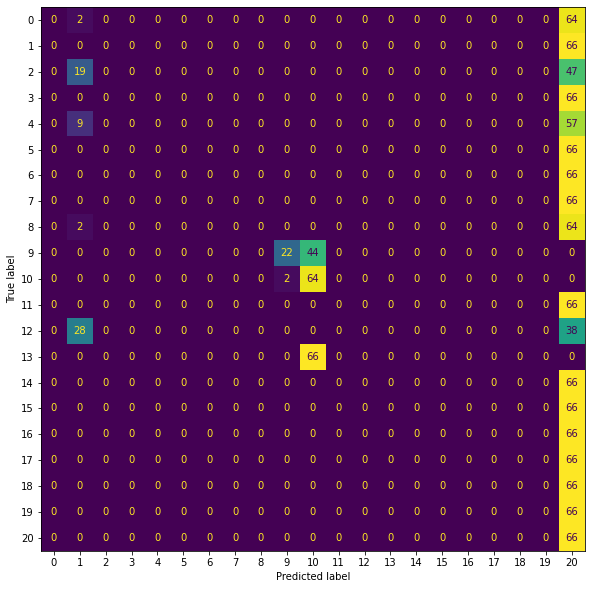

In [16]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

predictBase = randomForest.predict(baseTreino)

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(randomForest, Letras, Classes, colorbar=False, ax=ax)